<h1 align=center style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#8fcc00ff">تاثیر تخفیف</font>
</h1>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در این قسمت قصد داریم تا تاثیر بررسی کنیم که آیا تخفیف بر روی آیتم‌ها، باعث تغییر محسوسی روی فروش تعداد می‌شود یا خیر.<br>
</font>
</p>

In [1]:
import pandas as pd
from scipy import stats
import plotly.express as px
import plotly.figure_factory as ff
import numpy as np


<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
به منظور آسان تر شدن کار یک تابع ایجاد کردیم که از داد ها تست سنجش نرمال بودن را میگیرد و نتیجه را گزارش می کند.
<br>
</font>
</p>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در این قسمت متوجه شدیم که تست Shapiro وقتی بر روی مجموعه داده با بیش از 5 هزار رکورد انجام شود، دقت آن کمتر میشود.
برای اطمینان از صحت نتایج برای داده های بزرگتر تست Kolmogorov-Smirnov را انتخاب کردیم تا توضیع داده های داده شده را با نرمال مقایسه کند و نتیجه را گزارش کند.
<br>
</font>
</p>

In [2]:
def normality_test(data, label):
    _, pval = stats.shapiro(data)
    print("Shapiro Test: ", end='')
    if pval < 0.05:
        print(f'The distribution of {label} is NOT NORMAL')
    else:
        print(f'The distribution of {label} is NORMAL')
    n = data.shape[0]
    if n > 5000:
        print("Kolmogorov-Smirnov Test: ", end='')
        critical_value = 1.36/np.sqrt(n) # Kolmogorov-Smirnov Table
        ks_statistic, ks_p_value = stats.kstest(data, 'norm')
        if ks_p_value < 0.05 or ks_statistic > critical_value:
            print(f'The distribution of {label} is NOT NORMAL')
        else:
            print(f'The distribution of {label} is NORMAL')
    print('\n')

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
حال داده ها را از فایل خوانده و یک ستون جدید به آن ها اضافه کرده تا معلوم شود کدام مقادیر برای فروش با تخفیف هست و کدام برای بدون تخفیف
<br>
</font>
</p>


In [3]:
df = pd.read_csv('stats.csv')
df['Has_discount'] = df['Discount'].apply(lambda x: True if x > 0  else False)


<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
ابتدا نمودار توضیع داده ها را رسم میکنیم
<br>
</font>
</p>


In [4]:
# plotting
fig = px.histogram(df, x='Quantity',
                    color='Has_discount',
                    hover_data=df.columns,
                    width=1024,
                    height=512,
                    opacity=0.7,
                    barmode='overlay',
                    title='Distribution of Quantity of sold items in discount or non discount groups'
                    )
fig.show()

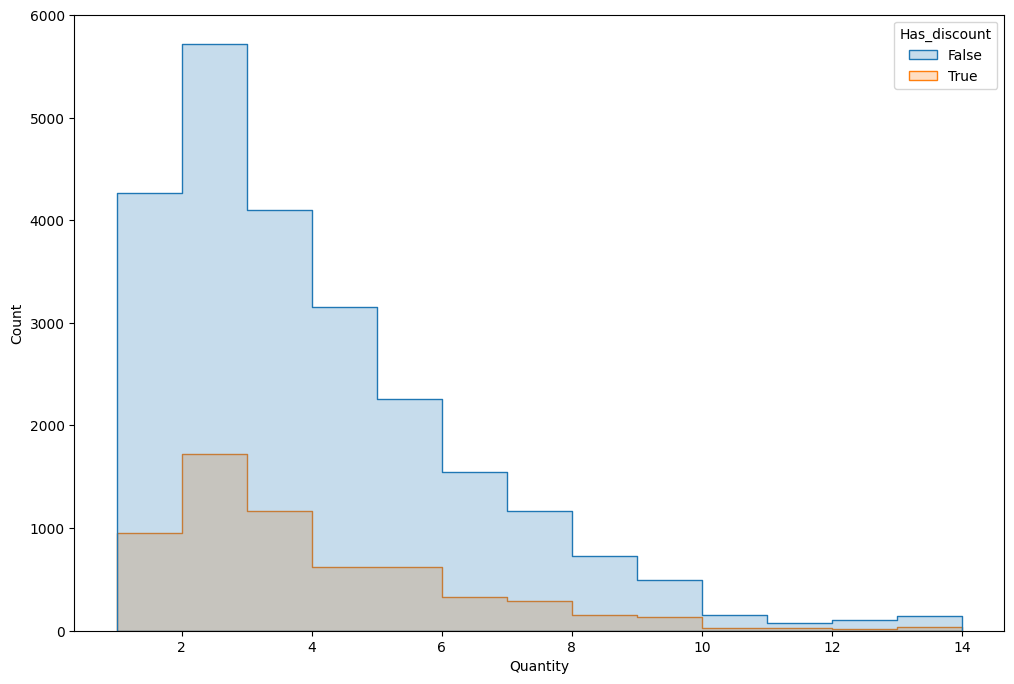

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
sns.histplot(df, x='Quantity', hue='Has_discount', element='step', binwidth=1, ax=ax)
plt.show()

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
همانطور که از نمودار مشخص هست داده های هر دو گروه نرمال نیستند و میتوانیم با تست نرمال بودن هم به این موضوع برسیم 
<br>
</font>
</p>


In [5]:
with_discount = df[df['Has_discount'] == True][['Quantity']]
without_discount = df[df['Has_discount'] == False][['Quantity']]

In [7]:
normality_test(without_discount['Quantity'], 'Group without discount')
normality_test(with_discount['Quantity'], 'Group with discount')

Shapiro Test: The distribution of Group without discount is NOT NORMAL
Kolmogorov-Smirnov Test: The distribution of Group without discount is NOT NORMAL


Shapiro Test: The distribution of Group with discount is NOT NORMAL
Kolmogorov-Smirnov Test: The distribution of Group with discount is NOT NORMAL




<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
همانطور که قبلا اشاره کردیم برای داده با رکورد های زیاد ممکن است دقت تست Shapiro کمتر شود. همانطور که از خروجی میبینیم خود تابع این موضوع را هشدار می دهد.
با این حال می بینیم که هر دو تست به ما نتیجه یکسانی می دهند. داده های هر دو گروه نرمال نیستند
<br>
</font>
</p>
<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
فرض صفر در آزمون Kolmogorv-Smirnov این است که نمونه ها از یک توضیع گرفته شدند.
در حالتی که فقط یک نمونه به این تست بدهیم باید مشخص کنیم نسبت به چه توضیعی سنجیده شود. در واقع این تست همقوارگی بین دو نمونه را با هم مقایسه می کند.
<br>
</font>
</p>


--------------------------

In [193]:
ustat, pval = stats.mannwhitneyu(with_discount['Quantity'], without_discount['Quantity'])
print(f"Mann-Whitney U: U={ustat:.3f}, p={pval}")

if pval < 0.05:
    print('ُSuggesting statistically significant difference between the groups. rejecting null hypothesis')
else:
    print("Fail to reject the null hypothesis. There's insufficient evidence to conclude a significant difference.")

Mann-Whitney U: U=71306336.000, p=0.012151685402605217
ُSuggesting statistically significant difference between the groups. rejecting null hypothesis


<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
حال که توضیع داده ها در هر دو گروه نرمال نیست باید از تست های بدون پارامتر استفاده کنیم. برای این بخش ما به سراغ تست Mann-WhitneyU رفتیم. با توجه به نتیجه تست داشتن تخفیف تغییر محسوسی در میزان تعداد فروخته شده ایجاد میکند.
<br>
</font>
</p>


----------------

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
حال قصد داریم بررسی کنیم که آیا در گروه اغلام تخفیف دار، آیا میزان تخفیف بر تعداد فروخته شده تاثیر دارد یا نه.
<br>
</font>
</p>

In [180]:
df['Discount'].unique()

array([0.        , 0.002     , 0.07      , 0.1       , 0.15000001,
       0.17      , 0.2       ])

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
همانطور که از داده ها مشخص است برای این دیتاست ما 6 نوع تخفیف داریم.
<br>
0.2 درصد
<br>
7 درصد
<br>
10 درصد 
<br>
15 دصد
<br>
17 درصد
<br>
و 20 درصد
<br>
</font>
</p>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
با توجه به این تخفیف ها ما تصمیم گرفتم به صورت زیر داد ها را به سه گروه تقسیم کنیم.
<br>
تا 6 درصد تخفیف در گروه تخفیف کم
<br>
از 6 درصد تا 14 درصد در گروه متوسط
<br>
و از 14 درصد به بالا در گروه زیاد
<br>
</font>
</p>

In [181]:
bins = [-1, .006, .14, np.inf]
bin_labels = ['Low', 'Mid', "High"]
df['Discount_group'] = pd.cut(df['Discount'], bins=bins, labels=bin_labels)
df_dis_group = df[df['Has_discount'] == True]

In [182]:
fig = px.histogram(df_dis_group, x='Quantity',
                    color='Discount_group',
                    hover_data=df_dis_group.columns,
                    width=1024,
                    height=512,
                    opacity=0.5,
                    barmode='overlay',
                    # marginal='box',
                    title='Distribution of Quantity of sold items in each Discount Group'
                    )
fig.show()

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
باز هم می توان با نمودار ها به نرمال نبودن توضیع داده ها در گروه های مختلف رسید. برای اطمینان تست نرمال بودن را اجرا میکنیم.
<br>
</font>
</p>


In [140]:
group_high = df_dis_group[df_dis_group['Discount_group'] == 'High']['Quantity']
group_mid = df_dis_group[df_dis_group['Discount_group'] == 'Mid']['Quantity']
group_low = df_dis_group[df_dis_group['Discount_group'] == 'Low']['Quantity']
groups = [group_low, group_mid, group_high]

In [185]:
normality_test(group_high, 'High Discount Group')
normality_test(group_mid, 'Mid Discount Group')
normality_test(group_low, 'Low Discount Group')

Shapiro Test: The distribution of High Discount Group is NOT NORMAL


Shapiro Test: The distribution of Mid Discount Group is NOT NORMAL


Shapiro Test: The distribution of Low Discount Group is NOT NORMAL




--------------

In [195]:
stat, p = stats.kruskal(*groups)
print(f"Kruskal–Wallis: H={stat:.3f}, p={p}")
if p < 0.05:
    print('At least one of the independent samples does not have the same central tendency as the other samples and suggesting statistically significant difference between the groups. Rejecting null hypothesis')
else:
    print('Fail to reject null hypothesis. The independent samples all have the same central tendency and therefore come from the same population.')

Kruskal–Wallis: H=451.937, p=7.297336249369169e-99
At least one of the independent samples does not have the same central tendency as the other samples and suggesting statistically significant difference between the groups. Rejecting null hypothesis


<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در این تست نیز می بینیم که حداقل یک گروه در بین گروه ها با بقیه متفاوت است. میتوانیم با تست دو به دوی گروه ها این موضوع را ببینیم.
<br>
</font>
</p>


In [170]:
pairs = [
    (group_high, group_mid, 'High vs Mid'),
    (group_mid, group_low, 'Mid vs Low'),
    (group_low, group_high, 'Low vs High')
]


In [196]:
for group1, group2, label in pairs:
    print('='*20)
    print('Comparing ', label,)
    ustat, pval = stats.mannwhitneyu(group1, group2)
    print(f"Mann-Whitney U: U={ustat:.3f}, p={pval}")

    if pval < 0.05:
        print('ُSuggesting statistically significant difference between the groups. rejecting null hypothesis')
    else:
        print("Fail to reject the null hypothesis. There's insufficient evidence to conclude a significant difference.")

Comparing  High vs Mid
Mann-Whitney U: U=2470913.500, p=5.823859946771927e-97
ُSuggesting statistically significant difference between the groups. rejecting null hypothesis
Comparing  Mid vs Low
Mann-Whitney U: U=848079.000, p=0.16169916278261753
Fail to reject the null hypothesis. There's insufficient evidence to conclude a significant difference.
Comparing  Low vs High
Mann-Whitney U: U=615159.500, p=3.280136433265099e-27
ُSuggesting statistically significant difference between the groups. rejecting null hypothesis


<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
با توجه به نتایج این تست می بینیم که بین تخفیف های کم و متوسط اختلاف آماری زیادی دیده نمی شود. اما گروه تخفیف های زیاد با این دو گروه اختلاف آماری دارد. 
<br>
</font>
</p>
